In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score


In [2]:
csv_data_path = 'predictions_2023.csv'
results_df = pd.read_csv(csv_data_path)

In [3]:
results_df['timestamp'] = pd.to_datetime(results_df['timestamp'])

In [4]:
results_df

,timestamp,true,pred
0,2022-04-05,163.76000,164.94925
1,2022-04-06,164.66000,165.68292
2,2022-04-10,162.03000,166.13208
3,2022-04-11,160.80000,164.39738
4,2022-04-12,160.10000,164.46915
...,...,...,...
180,2022-12-21,194.67998,197.50204
181,2022-12-22,193.59999,196.55620
182,2022-12-26,193.04999,195.53730
183,2022-12-27,193.15000,195.27322


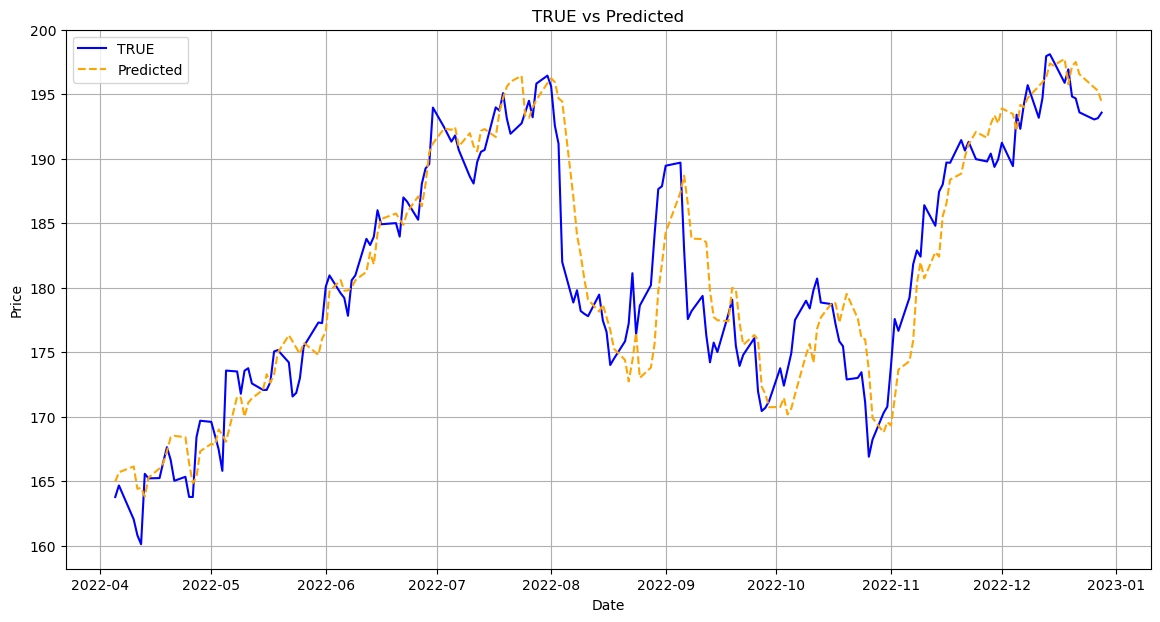

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(results_df['timestamp'], results_df['true'], label='TRUE', color='blue', linestyle='-')
plt.plot(results_df['timestamp'], results_df['pred'], label='Predicted', color='orange', linestyle='--')
plt.title('TRUE vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score

def calculate_mse(y_actual, y_predicted):
    return mean_squared_error(y_actual, y_predicted)

def calculate_accuracy(y_actual, y_predicted):
    correct_predictions = 0
    total_predictions = 0
    for i in range(1, len(y_actual)):
        actual_today = y_actual.iloc[i]
        predicted_today = y_predicted.iloc[i]
        actual_yesterday = y_actual.iloc[i - 1]
        actual_movement = actual_today - actual_yesterday
        predicted_movement = predicted_today - actual_yesterday
        if (actual_movement > 0 and predicted_movement > 0) or (actual_movement < 0 and predicted_movement < 0):
            correct_predictions += 1
        total_predictions += 1
    return correct_predictions / total_predictions if total_predictions > 0 else 0

def calculate_profit(y_actual, y_predicted, initial_capital=100):
    capital = initial_capital
    position = 0

    for i in range(1, len(y_actual)):
        today_price = y_actual.iloc[i]
        yesterday_price = y_actual.iloc[i - 1]
        predicted_today_price = y_predicted.iloc[i]

        if predicted_today_price > yesterday_price:
            if position == 0:
                position = capital / yesterday_price
                capital = 0
        elif predicted_today_price < yesterday_price:
            if position > 0:
                capital = position * yesterday_price
                position = 0

    if position > 0:
        capital = position * y_actual.iloc[-1]

    return capital - initial_capital

def calculate_actual_direction_accuracy(y_actual, y_predicted):
    def get_direction(current_price, next_price):
        return 1 if next_price > current_price else 0

    real_directions = []
    predicted_directions = []

    for i in range(1, len(y_actual)):
        real_directions.append(get_direction(y_actual.iloc[i - 1], y_actual.iloc[i]))
        predicted_directions.append(get_direction(y_actual.iloc[i - 1], y_predicted.iloc[i]))

    return accuracy_score(real_directions, predicted_directions)

def calculate_direction_accuracy(y_actual, y_predicted):
    def get_direction(current_price, next_price):
        return 1 if next_price > current_price else 0

    real_directions = []
    predicted_directions = []

    for i in range(1, len(y_actual)):
        real_directions.append(get_direction(y_actual.iloc[i - 1], y_actual.iloc[i]))
        predicted_directions.append(get_direction(y_predicted.iloc[i - 1], y_predicted.iloc[i]))

    return accuracy_score(real_directions, predicted_directions)

def calculate_direction_profit(y_actual, y_predicted, initial_capital=100):
    capital = initial_capital
    position = 0

    for i in range(2, len(y_actual)):
        yesterday_price = y_actual.iloc[i - 1]
        yesterday_predicted_today_price = y_predicted.iloc[i - 1]
        predicted_today_price = y_predicted.iloc[i]

        if predicted_today_price > yesterday_predicted_today_price:
            if position == 0:
                position = capital / yesterday_price
                capital = 0
        elif predicted_today_price < yesterday_predicted_today_price:
            if position > 0:
                capital = position * yesterday_price
                position = 0

    if position > 0:
        capital = position * y_actual.iloc[-1]

    return capital - initial_capital

def calculate_final_results(results_df):
    y_actual = results_df['true']
    pred = results_df['pred']

    mse_value = calculate_mse(y_actual, pred)
    accuracy_value = calculate_accuracy(y_actual, pred)
    profit = calculate_profit(y_actual, pred)
    direction_accuracy = calculate_direction_accuracy(y_actual, pred)
    actual_direction_accuracy = calculate_actual_direction_accuracy(y_actual, pred)
    direction_profit = calculate_direction_profit(y_actual, pred)

    return pd.DataFrame({
        'mse': [mse_value],
        'accuracy': [accuracy_value],
        'direction_accuracy': [direction_accuracy],
        'actual_direction_accuracy': [actual_direction_accuracy],
        'direction_profit': [direction_profit],
        'profit': [profit],
    })


final_results = calculate_final_results(results_df)

# Print the results
print(final_results)


         mse  accuracy  direction_accuracy  actual_direction_accuracy  \
0  10.594502       0.5             0.51087                        0.5   

   direction_profit    profit  
0         16.705025  2.291924  


In [7]:

# Assume an initial investment
initial_investment = 100

# Find the initial and final price from the 'TRUE' column
initial_price = results_df['true'].iloc[0]
final_price = results_df['true'].iloc[-1]

# Calculate the number of shares bought initially
shares_bought = initial_investment / initial_price

# Calculate the final value of the investment
final_investment_value = shares_bought * final_price

# Calculate the total profit
buy_and_hold_profit = final_investment_value - initial_investment

# Print the buy and hold profit
print(f"Buy and Hold Profit: ${buy_and_hold_profit:.2f}")


Buy and Hold Profit: $18.21
